# Zacks: Earnings Surprise

In this notebook, we'll take a look at Zacks's *Earnings Surprise* dataset, available on [Quantopian](https://www.quantopian.com/store). This dataset spans 2006 through the current day. It contains earnings surprises, analyst estimats, and actual EPS numbers for X securities.

## Notebook Contents

There are two ways to access the data and you'll find both of them listed below. Just click on the section you'd like to read through.

- <a href='#interactive'><strong>Interactive overview</strong></a>: This is only available on Research and uses blaze to give you access to large amounts of data. Recommended for exploration and plotting.
- <strong>Pipeline overview</strong> (Not Available Yet): Data is made available through pipeline which is available on both the Research & Backtesting environment. Recommended for custom factor development and moving back & forth between research/backtesting.

### Free samples and limits
One key caveat: we limit the number of results returned from any given expression to 10,000 to protect against runaway memory usage. To be clear, you have access to all the data server side. We are limiting the size of the responses back from Blaze.

There is a *free* version of this dataset as well as a paid one. The free sample includes data until 2 months prior to the current date.

To access the most up-to-date values for this data set for trading a live algorithm (as with other partner sets), you need to purchase acess to the full set.

With preamble in place, let's get started:

<a id='interactive'></a>
#Interactive Overview
### Accessing the data with Blaze and Interactive on Research
Partner datasets are available on Quantopian Research through an API service known as [Blaze](http://blaze.pydata.org). Blaze provides the Quantopian user with a convenient interface to access very large datasets, in an interactive, generic manner.

Blaze provides an important function for accessing these datasets. Some of these sets are many millions of records. Bringing that data directly into Quantopian Research directly just is not viable. So Blaze allows us to provide a simple querying interface and shift the burden over to the server side.

It is common to use Blaze to reduce your dataset in size, convert it over to Pandas and then to use Pandas for further computation, manipulation and visualization.

Helpful links:
* [Query building for Blaze](http://blaze.readthedocs.io/en/latest/queries.html)
* [Pandas-to-Blaze dictionary](http://blaze.readthedocs.io/en/latest/rosetta-pandas.html)
* [SQL-to-Blaze dictionary](http://blaze.readthedocs.io/en/latest/rosetta-sql.html).

Once you've limited the size of your Blaze object, you can convert it to a Pandas DataFrames using:
> `from odo import odo`  
> `odo(expr, pandas.DataFrame)`


###To see how this data can be used in your algorithm, search for the `Pipeline Overview` section of this notebook or head straight to <a href='#pipeline'>Pipeline Overview</a>

In [1]:
# import the dataset
from quantopian.interactive.data.zacks import earnings_surprises as dataset

# or if you want to import the paid dataset, use:
# from quantopian.interactive.data.zacks import earnings_surprises_free

# import data operations
from odo import odo
# import other libraries we will use
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Let's use blaze to understand the data a bit using Blaze dshape()
dataset.timestamp.min()

Timestamp('2006-05-27 00:00:00')

In [6]:
# And how many rows are there?
# N.B. we're using a Blaze function to do this, not len()
dataset.count()

146923

In [7]:
# Let's see what the data looks like. We'll grab the first three rows.
dataset[:3]

,file_prod_date,symbol,comp_name,comp_name_2,exchange,currency_code,per_type,eps_mean_est,eps_act,eps_amt_diff_surp,eps_pct_diff_surp,eps_std_dev_est,eps_cnt_est,eps_act_zacks_adj,per_fisc_year,per_fisc_qtr,per_end_date,per_cal_year,per_cal_qtr,act_rpt_code,act_rpt_desc,act_rpt_date_time,m_ticker,per_code,sid,asof_date,timestamp
0,2016-05-31,ADBE,ADOBE SYSTEMS,Adobe Systems Inc.,NSDQ,USD,Q,0.27,0.28,0.01,3.70,0,5,-0.08,2006,2,2006-05-31,2006,2,None,None,2006-06-16 03:59:59,ADBE,QR-39,114,2006-06-16,2006-06-17
1,2016-05-31,AIR,AAR CORP,AAR Corp.,NYSE,USD,Q,0.29,0.31,0.02,6.90,NaN,1,0.00,2006,4,2006-05-31,2006,2,None,None,2006-07-13 03:59:59,AAR7,QR-39,253,2006-07-13,2006-07-14
2,2016-05-31,APOG,APOGEE ENTRPRS,Apogee Enterprises Inc.,NSDQ,USD,Q,0.16,0.17,0.01,6.25,NaN,1,0.00,2007,1,2006-05-31,2006,2,None,None,2006-06-28 03:59:59,APOG,QR-39,474,2006-06-28,2006-06-29


Let's go over the columns:
- **symbol**: the ticker symbol of the company.
- **comp_name**: the name of the company.
- **comp_name_2**: the name of the company.
- **exchange**: what the exchange stock is currently trading 
- **currency_code**: currency code
- **per_type**: period type (e.g. Q for quarter)
- **sid**: the equity's unique identifier. Use this instead of ticker or name. 
- **eps_mean_est**: Earnings per share (EPS) mean estimate for the period
- **eps_act**: Earnings per share (EPS) actual for the period
- **eps_amt_diff_surp**: Earnings per share (EPS) surprise amount for the period
- **eps_pct_diff_surp**: Earnings per share (EPS) surprise percent for the period
- **eps_std_dev_est**: Earnings per share (EPS) standard deviation in estimate for the period
- **eps_cnt_est**: Number of estimates for the period
- **eps_act_zacks_adj**: Estimated earnings per share (EPS) (Zacks adjustment)
- **per_fisc_year**: Period fiscal year
- **per_fisc_qtr**: Period fiscal quarter
- **per_end_date**: Period end date
- **per_cal_year**: Period calendar year
- **per_cal_qtr**: Period calender quarter
- **act_rpt_code**: Actual report time of day code (BTO - before the open, DTM - during the market, AMC - after market close)
- **act_rpt_desc**: Actual report time of day description
- **act_rpt_date_time**: Actual report timestamp (eastern time)
- **m_ticker**: Master ticker or trading symbol
- **asof_date**: The date to which this data applies/Actual report date
- **timestamp**: This is our timestamp on when we registered the data.

We've done much of the data processing for you. Fields like `timestamp` and `sid` are standardized across all our Store Datasets, so the datasets are easy to combine. We have standardized the `sid` across all our equity databases.

We can select columns and rows with ease. Below, we'll fetch all entries for the sid 24 (AAPL) and plot the earnings surprises for that.

In [9]:
aapl = dataset[dataset.sid==24][['eps_pct_diff_surp','eps_mean_est', 'eps_act', 'eps_std_dev_est', 'asof_date']].sort('asof_date')
aapl

,eps_pct_diff_surp,eps_mean_est,eps_act,eps_std_dev_est,asof_date
0,22.73,0.0629,0.0771,0.0029,2006-07-20
1,24.00,0.0714,0.0886,0.0029,2006-10-19
2,46.15,0.1114,0.1629,0.0043,2007-01-18
3,38.10,0.0900,0.1243,0.0071,2007-04-26
4,29.58,0.1014,0.1314,0.0043,2007-07-26
5,20.24,0.1200,0.1443,0.0100,2007-10-23
6,9.32,0.2300,0.2514,0.0143,2008-01-23
7,9.43,0.1514,0.1657,0.0086,2008-04-24
8,12.26,0.1514,0.1700,0.0057,2008-07-22
9,13.51,0.1586,0.1800,0.0071,2008-10-22


Let's convert `aapl` to a DataFrame.

In [10]:
aapl_surprise = odo(aapl, pd.DataFrame)
# suppose we want the rows to be indexed by timestamp.
aapl_surprise.index = list(aapl_surprise['asof_date'])
aapl_surprise.drop('asof_date',1,inplace=True)
# display the first three rows. DataFrames, when printed, display 60 rows at a time.
aapl_surprise[:3]

,eps_pct_diff_surp,eps_mean_est,eps_act,eps_std_dev_est
2006-07-20,22.73,0.0629,0.0771,0.0029
2006-10-19,24.00,0.0714,0.0886,0.0029
2007-01-18,46.15,0.1114,0.1629,0.0043


<a id='pipeline'></a>

#Pipeline Overview

### Accessing the data in your algorithms & research
The only method for accessing partner data within algorithms running on Quantopian is via the pipeline API. Different data sets work differently but in the case of this data, you can add this data to your pipeline as follows:

Import the data set here
> `from quantopian.pipeline.data.zacks import (`
> `EarningsSurprises`
> `)`

Then in intialize() you could do something simple like adding the raw value of one of the fields to your pipeline:
> `pipe.add(zacks.eps_mean_est.latest, 'EPS mean estimate')`

In [1]:
# Import necessary Pipeline modules
from quantopian.pipeline import Pipeline
from quantopian.research import run_pipeline
from quantopian.pipeline.factors import AverageDollarVolume

In [2]:
# For use in your algorithms
# Using the full/sample paid dataset in your pipeline algo
from quantopian.pipeline.data.zacks import EarningsSurprises

Now that we've imported the data, let's take a look at which fields are available for each dataset.

You'll find the dataset, the available fields, and the datatypes for each of those fields.

In [4]:
print "Here are the list of available fields per dataset:"
print "---------------------------------------------------\n"

def _print_fields(dataset):
    print "Dataset: %s\n" % dataset.__name__
    print "Fields:"
    for field in list(dataset.columns):
        print "%s - %s" % (field.name, field.dtype)
    print "\n"

for data in (EarningsSurprises,):
    _print_fields(data)


print "---------------------------------------------------\n"

Here are the list of available fields per dataset:
---------------------------------------------------

Dataset: EarningsSurprises

Fields:
per_cal_qtr - float64
eps_cnt_est - float64
per_cal_year - float64
per_fisc_qtr - float64
eps_amt_diff_surp - float64
eps_act_zacks_adj - float64
per_fisc_year - float64
eps_mean_est - float64
eps_act - float64
asof_date - datetime64[ns]
per_type - object
per_end_date - datetime64[ns]
act_rpt_desc - object
eps_std_dev_est - float64
act_rpt_code - object
eps_pct_diff_surp - float64


---------------------------------------------------



Now that we know what fields we have access to, let's see what this data looks like when we run it through Pipeline.


This is constructed the same way as you would in the backtester. For more information on using Pipeline in Research view this thread:
https://www.quantopian.com/posts/pipeline-in-research-build-test-and-visualize-your-factors-and-filters

In [6]:
# Let's see what this data looks like when we run it through Pipeline
# This is constructed the same way as you would in the backtester. For more information
# on using Pipeline in Research view this thread:
# https://www.quantopian.com/posts/pipeline-in-research-build-test-and-visualize-your-factors-and-filters

# Setting some basic liquidity strings (just for good habit)
dollar_volume = AverageDollarVolume(window_length=20)
top_1000_most_liquid = dollar_volume.rank(ascending=False) < 1000

pipe = Pipeline(
    columns={
        'EPS mean estimate': EarningsSurprises.eps_mean_est.latest,
        'Zacks adj': EarningsSurprises.eps_act_zacks_adj.latest,
        'eps_act': EarningsSurprises.eps_act.latest
    },
    screen=(top_1000_most_liquid & EarningsSurprises.eps_mean_est.latest.notnan())
)

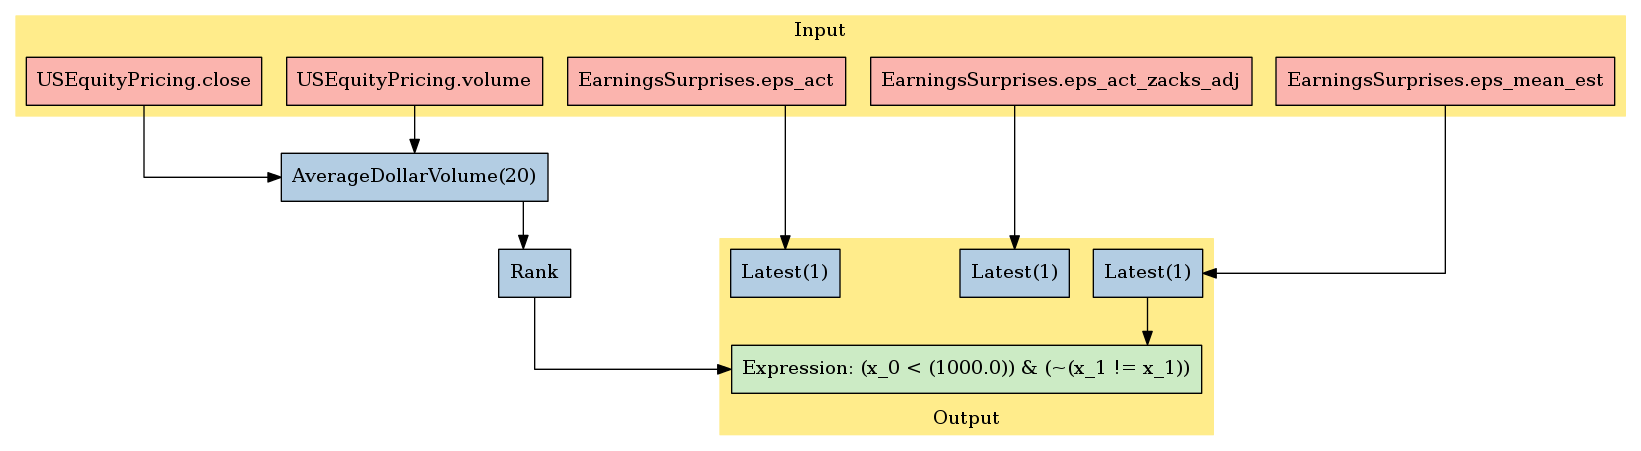

In [7]:
# The show_graph() method of pipeline objects produces a graph to show how it is being calculated.
pipe.show_graph(format='png')

In [8]:
# run_pipeline will show the output of your pipeline
pipe_output = run_pipeline(pipe, start_date='2016-03-01', end_date='2016-03-02')
pipe_output

EPS mean estimate  Zacks adj  \
2016-03-01 00:00:00+00:00 Equity(2 [AA])                     0.03      -0.43   
                          Equity(24 [AAPL])                  3.24       0.00   
                          Equity(53 [ABMD])                  0.16       0.00   
                          Equity(62 [ABT])                   0.61      -0.11   
                          Equity(64 [ABX])                   0.07      -2.33   
                          Equity(67 [ADSK])                 -0.07      -0.11   
                          Equity(76 [TAP])                   0.57       0.00   
                          Equity(114 [ADBE])                 0.45      -0.03   
                          Equity(122 [ADI])                  0.53      -0.04   
                          Equity(128 [ADM])                  0.65       0.58   
                          Equity(154 [AEM])                 -0.01      -0.07   
                          Equity(161 [AEP])                  0.50       0.48   
                          Equity(166 [AES])                  0.33      -0.47   
                          Equity(168 [AET])                  1.20      -0.46   
                          Equity(185 [AFL])                  1.48       0.15   
                          Equity(197 [AGCO])                 0.79      -0.07   
                          Equity(216 [HES])                 -1.36      -5.03   
                          Equity(239 [AIG])                 -0.90      -0.40   
                          Equity(300 [ALK])                  1.43       0.05   
                          Equity(301 [ALKS])                -0.39      -0.16   
                          Equity(337 [AMAT])                 0.25      -0.01   
                          Equity(353 [AME])                  0.63      -0.06   
                          Equity(357 [TWX])                  1.01       0.00   
                          Equity(368 [AMGN])                 2.27      -0.24   
                          Equity(410 [AN])                   1.05      -0.09   
                          Equity(438 [AON])                  2.09      -0.18   
                          Equity(448 [APA])                 -0.52     -19.01   
                          Equity(455 [APC])                 -1.05      -1.88   
                          Equity(460 [APD])                  1.70      -0.11   
                          Equity(465 [APH])                  0.59       0.00   
...                                                           ...        ...   
2016-03-02 00:00:00+00:00 Equity(45971 [AAL])                1.96       3.09   
                          Equity(45992 [ARMK])               0.45      -0.08   
                          Equity(45993 [HLT])                0.22       0.60   
                          Equity(46015 [ALLY])               0.51      -2.49   
                          Equity(46693 [GRUB])               0.12      -0.04   
                          Equity(46776 [SABR])               0.26       0.22   
                          Equity(46979 [JD])                -0.09       0.00   
                          Equity(46989 [PE])                -0.07      -0.12   
                          Equity(47063 [ANET])               0.51      -0.07   
                          Equity(47126 [MRD])                0.10       0.05   
                          Equity(47169 [KITE])              -0.82       0.00   
                          Equity(47207 [SERV])               0.31      -0.21   
                          Equity(47208 [GPRO])              -0.12      -0.04   
                          Equity(47415 [SYF])                0.63       0.00   
                          Equity(47430 [MBLY])               0.09       0.00   
                          Equity(47740 [BABA])               0.70       0.03   
                          Equity(47777 [CFG])                0.42       0.00   
                          Equity(47833 [W])                 -0.28       0.00   
                          Equity(48065 [AXTA])  